## Mercedes-Benz Greener Manufacturing 

## Objective




Mercedes-Benz sells cars that can be customized in many different ways. The goal was to predict the length of time it takes for each configuration of car to pass testing. With that knowledge, the company could save time, cutting costs and pollutant emissions.


In [128]:
## Import all libraries 
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='dsdb', api_key='hi6k1rahAZ9jJS5RjDzV')

#Set inline mode
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import ensemble
from subprocess import check_output
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
%matplotlib inline

### Load the Data Set

In [129]:
## Load Data
Dataset = pd.read_csv("train.csv")

### Pandas Profiling

In [130]:
#Get profile report
Dataset_report = pandas_profiling.ProfileReport(Dataset)

#Convert profile report as html file
Dataset_report.to_file("Dataset_report.html")

In [72]:
Dataset_report

Number of variables,378
Number of observations,4209
Total Missing (%),0.0%
Total size in memory,12.1 MiB
Average record size in memory,3.0 KiB
Numeric,2
Categorical,8
Boolean,271
Date,0
Text (Unique),0
Rejected,97


In [131]:
#Create a copy of Dataset dataframe
Dataset_copy = Dataset.copy()

### Highly correlated features

In [133]:
# Correlation matrix
corr_matrix = Dataset.corr().abs()

# Highly correlated variables
high_corr_var=np.where(corr_matrix>0.91)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print(high_corr_var)

[('X14', 'X251'), ('X17', 'X382'), ('X19', 'X215'), ('X29', 'X54'), ('X29', 'X76'), ('X29', 'X136'), ('X29', 'X162'), ('X29', 'X232'), ('X29', 'X263'), ('X29', 'X272'), ('X29', 'X276'), ('X29', 'X279'), ('X29', 'X328'), ('X31', 'X35'), ('X31', 'X37'), ('X33', 'X39'), ('X35', 'X37'), ('X44', 'X302'), ('X48', 'X111'), ('X48', 'X113'), ('X48', 'X134'), ('X48', 'X147'), ('X48', 'X198'), ('X48', 'X222'), ('X49', 'X129'), ('X52', 'X61'), ('X52', 'X120'), ('X53', 'X102'), ('X53', 'X214'), ('X53', 'X239'), ('X53', 'X370'), ('X54', 'X76'), ('X54', 'X136'), ('X54', 'X162'), ('X54', 'X232'), ('X54', 'X263'), ('X54', 'X272'), ('X54', 'X276'), ('X54', 'X279'), ('X54', 'X328'), ('X58', 'X137'), ('X58', 'X324'), ('X60', 'X248'), ('X60', 'X253'), ('X60', 'X385'), ('X61', 'X120'), ('X62', 'X172'), ('X62', 'X216'), ('X63', 'X379'), ('X66', 'X111'), ('X67', 'X213'), ('X71', 'X84'), ('X71', 'X244'), ('X76', 'X136'), ('X76', 'X162'), ('X76', 'X232'), ('X76', 'X263'), ('X76', 'X272'), ('X76', 'X276'), ('X76

### Remove highly correlated features

In [134]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Drop feature columns with correlation greater than 0.91
less_corr_df = Dataset.drop([column for column in upper.columns if any(upper[column] > 0.91)], axis = 1)

In [135]:
#Create a copy of Dataframe
less_corr_df_copy = less_corr_df.copy()

### One Hot Encoding

Representation of categorical variables as binary vectors

In [136]:
col_objects_only = Dataset.columns[Dataset.dtypes.eq('object')]
Dateset = pd.get_dummies(less_corr_df,columns=col_objects_only)

### Extration of features and Target values

In [137]:
data = Dateset.values
X = data[:,2:]
y = data[:,1]

print(X.shape)
print(y.shape)

(4209, 471)
(4209,)


### Univariate Analysis
 Target variable 'y' represents the time (in seconds) that the car took to pass testing.

In [116]:
## Distribution of Target values(y)

fig = {
    "data": [{
        "type": 'violin',
        "y": less_corr_df['y'],
        "box": {
            "visible": True
        },
        "line": {
            "color": 'black'
        },
        "meanline": {
            "visible": True
        },
        "fillcolor": '#8dd3c7',
        "opacity": 0.6,
        "x0": 'Time (in seconds)'
    }],
    "layout" : {
        "title": 'Time taken by car to pass testing',
        "yaxis": {
            "zeroline": False,
        }
    }
}

py.iplot(fig, filename = 'y', validate = False)

### Bivarate Analysis
Distribution of individual categorical feature values in comparion with target variable 

In [143]:
## Distribution of categorial feature X0 w.r.t target variable y
trace0 = go.Scatter(
    x = less_corr_df['X0'],
    y = less_corr_df['y'],
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

data = [trace0]

layout = dict(title = 'X0 vs y',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='X0 vs y')

In [144]:
## Distribution of categorial feature X1 w.r.t target variable y
trace1 = go.Scatter(
    x = less_corr_df['X1'],
    y = less_corr_df['y'],
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0]

layout = dict(title = 'X1 vs y',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='X1 vs y')

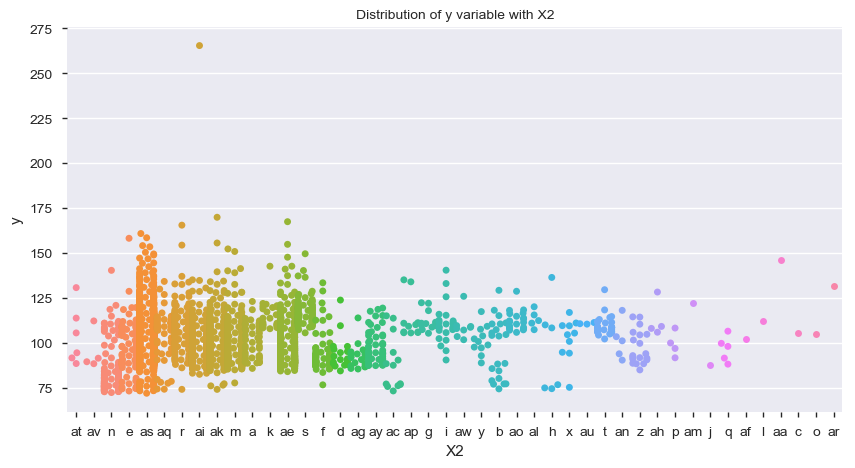

In [139]:
## Distribution of categorial feature X2 w.r.t target variable y
plt.figure(figsize=(10,5))
sns.swarmplot(x=less_corr_df["X2"], y='y', data=less_corr_df)
plt.title("Distribution of y variable with "+"X2", fontsize=10)
plt.show()

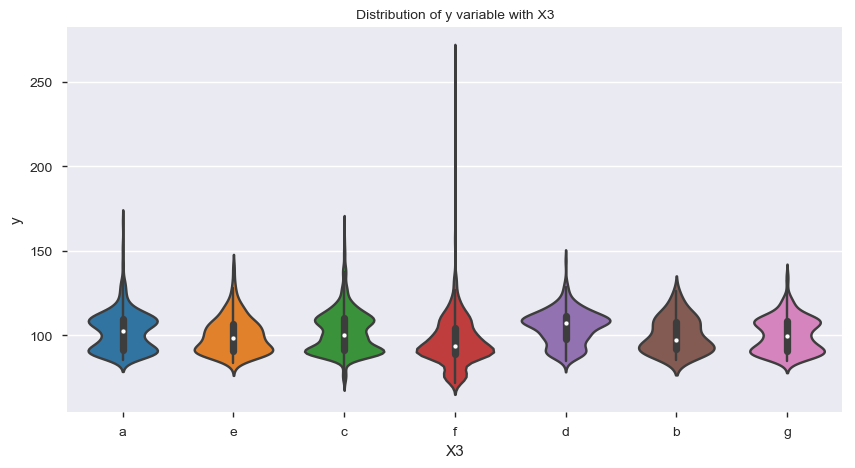

In [84]:
## Distribution of categorial feature X3 w.r.t target variable y
plt.figure(figsize=(10,5))
sns.violinplot(x=less_corr_df["X3"], y='y', data=less_corr_df)
plt.title("Distribution of y variable with "+"X3", fontsize=10)
plt.show()

In [145]:
## Distribution of categorial feature X4 w.r.t target variable y
trace = go.Scattergl(
    x = less_corr_df['X4'],
    y = less_corr_df['y'],
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data, filename='X4 vs y')

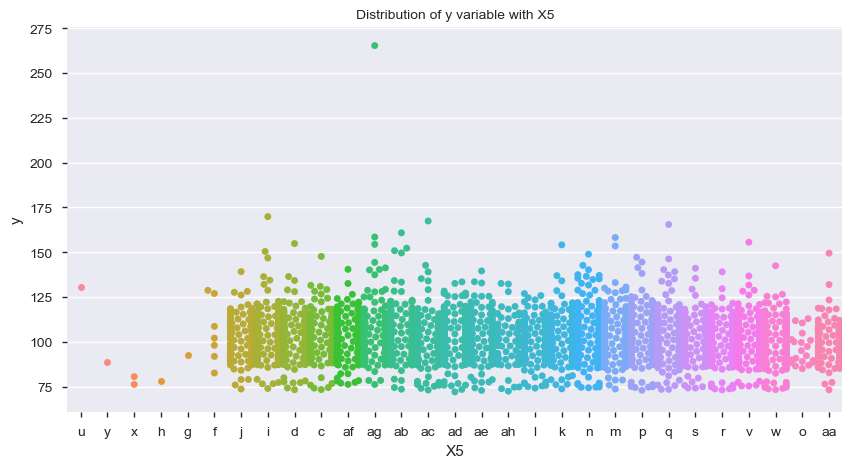

In [86]:
## Distribution of categorial feature X5 w.r.t target variable y
plt.figure(figsize=(10,5))
sns.swarmplot(x=less_corr_df["X5"], y='y', data=less_corr_df)
plt.title("Distribution of y variable with "+"X5", fontsize=10)
plt.show()

In [146]:
## Distribution of categorial feature X6 w.r.t target variable y
trace = go.Scattergl(
    x = less_corr_df['X6'],
    y = less_corr_df['y'],
    mode = 'markers',
    marker = dict(
        color = 'rgba(255, 182, 193, .9)',
        line = dict(width = 1)
    )
)
data = [trace]
py.iplot(data, filename='X6 vs y')

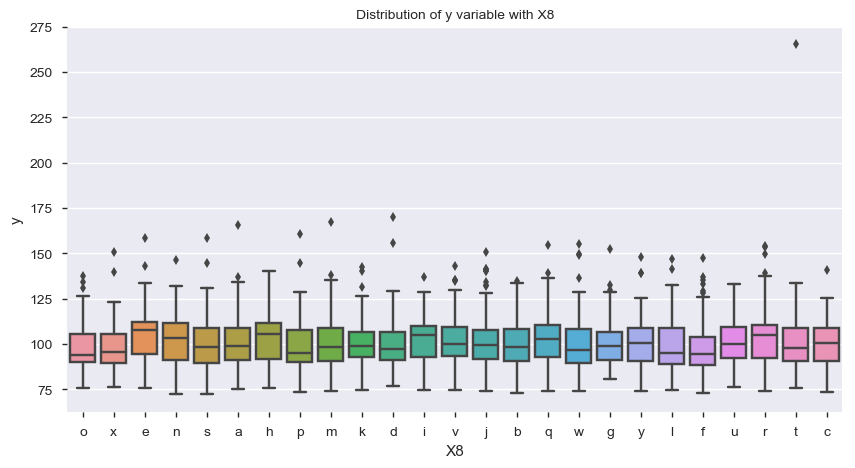

In [88]:
## Distribution of categorial feature X7 w.r.t target variable y
plt.figure(figsize=(10,5))
sns.boxplot(x=less_corr_df["X8"], y='y', data=less_corr_df)
plt.title("Distribution of y variable with "+"X8", fontsize=10)
plt.show()

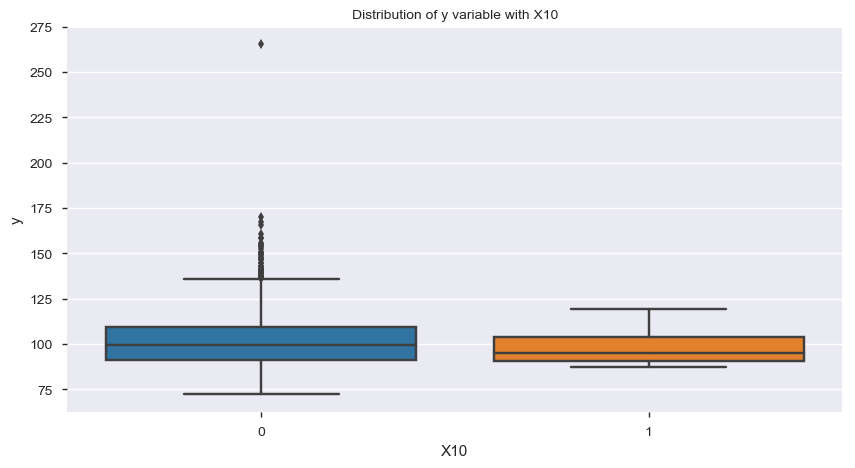

In [142]:
## Distribution of categorial feature X7 w.r.t target variable y
plt.figure(figsize=(10,5))
sns.boxplot(x=less_corr_df["X10"], y='y', data=less_corr_df)
plt.title("Distribution of y variable with "+"X10", fontsize=10)
plt.show()

### Standardize feature values

In [147]:
## Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

# Show result
print('Original number of features:', X.shape[1])

Original number of features: 471


### Dimensionality reduction

Conduct Principal Component Analysis


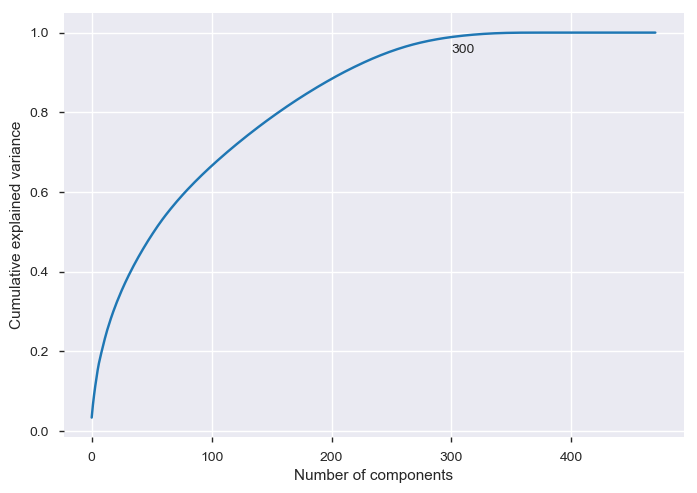

In [148]:
# Create PCA to retain 95% of the variance
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('300', xy=(300,.95))
plt.show()

In [101]:
## New features after PCA
new_x=PCA(n_components=300).fit_transform(X)

# Show result
print('Reduced number of features:', new_x.shape[1])

Reduced number of features: 300


### Train/Test Split

In [149]:
## Split train and test data
x_tr,x_ts,y_tr,y_ts=train_test_split(new_x,y,test_size=0.20,random_state=42)
print(x_tr.shape)
print(y_tr.shape)
print(x_ts.shape)
print(y_ts.shape)

(3367, 300)
(3367,)
(842, 300)
(842,)


### Model selection and evalution

In [150]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid_values = {'alpha': [0.0235, 0.024, 0.0245]}
# Model 
grid_lasso = GridSearchCV(Lasso(), param_grid = grid_values, cv=10, scoring = 'r2')

# Train
grid_lasso.fit(x_tr, y_tr)

#Test
predict_lasso = grid_lasso.predict(x_ts)

## Evaluation
print('Mean score matrix: ', grid_lasso.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_lasso.best_params_)
print('Grid best score (accuracy): ', grid_lasso.best_score_)


Mean score matrix:  [0.53420375 0.5344367  0.53466251]
Grid best parameter (max. accuracy):  {'alpha': 0.0245}
Grid best score (accuracy):  0.5346625066652729


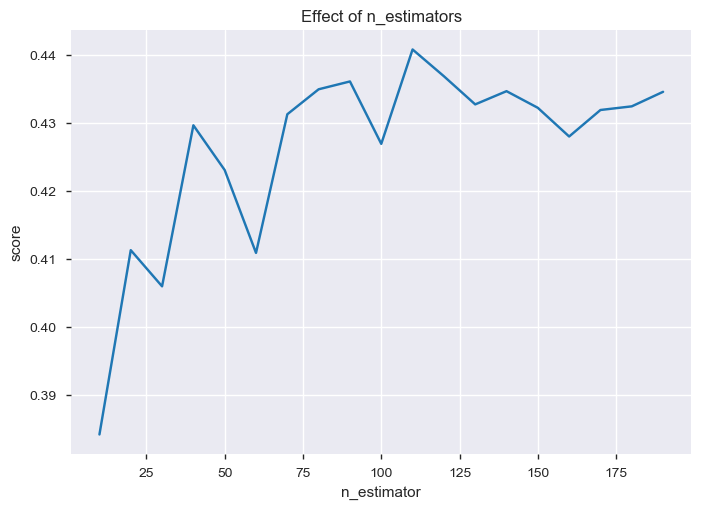

In [151]:
## RandomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

# Estimators
estimators = np.arange(10,200,10)
scores = []

# Model
for n in estimators:
    model.set_params(n_estimators=n)
    
# Train    
    model.fit(x_tr,y_tr)
    
# Test    
    scores.append(model.score(x_ts,y_ts))
    
# Evaluation    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators,scores)

In [152]:
## XGBoost 
import xgboost as xgb

grid_values = {'n_estimators': [73,74,75], 'learning_rate': [0.13,0.135,0.14], 'max_depth': [3,4,5]}

# Model
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')

# Train
grid_xgb.fit(x_tr, y_tr)

# Test
predict_xgb = grid_xgb.predict(x_ts)

# Evaluation

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.48104074 0.48098449 0.48143044 0.48765421 0.48756908 0.48713781
 0.47326487 0.47288392 0.47330909 0.47297367 0.47398003 0.47415415
 0.47722402 0.47754573 0.47766509 0.47110749 0.47103527 0.47058034
 0.47424932 0.47398188 0.4740094  0.48032783 0.47996179 0.48020914
 0.46872846 0.46879173 0.46861692]
Grid best parameter (max. accuracy):  {'learning_rate': 0.13, 'max_depth': 4, 'n_estimators': 73}
Grid best score (accuracy):  0.48765421231642964
